# COMP4030 - Data Science and Machine Learning

# Classification


**Topics from last labs you absolutely need to be familiar with**:

- how to conduct exploratory data analysis on a given dataset
- understand basic statistical descriptors and visualising statistical relationships
- data cleaning techniques
- normalisation


# Exercises to try out different Classification algorithms

### Read up on the following before doing the tasks

### Precision - Recall
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py 

### ROC curves
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

### Confusion Matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

### N-fold Cross Validation
https://scikit-learn.org/stable/modules/cross_validation.html


**Task 6**: 
- Load the iris dataset from scikit-learn and split it into training and testing sets. 
- Train a decision tree model to classify the different types of iris flowers based on their features. 
- Use the graphviz library to visualise the decision tree (actually there was a problem with the Graphviz installation in A32 due to the PATH not being properly set so matplotlib is used instead)

#### More information on Decision Trees https://scikit-learn.org/stable/modules/tree.html

In [2]:
pip install graphviz

[Text(0.3076923076923077, 0.9285714285714286, 'X[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'X[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'X[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

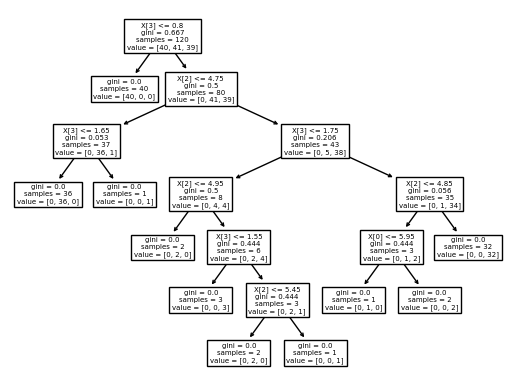

In [101]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Train a decision tree model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

#Note some students reported an error with using graphviz as they were not able to set the PATH so use this instead
tree.plot_tree(clf)

#### So how do you tell how good your model is?
Well, you can use a range of different metrics and scoring to quantify the quality of the predictions
It will help you to carefully review some the ones available as standard in scikitlearn:
https://scikit-learn.org/stable/modules/model_evaluation.html - Take some time reviewing these. 

In the example below I have used *accuracy* on the test set - note I turned it into a percentage.

Accuracy on test set: 98.33%


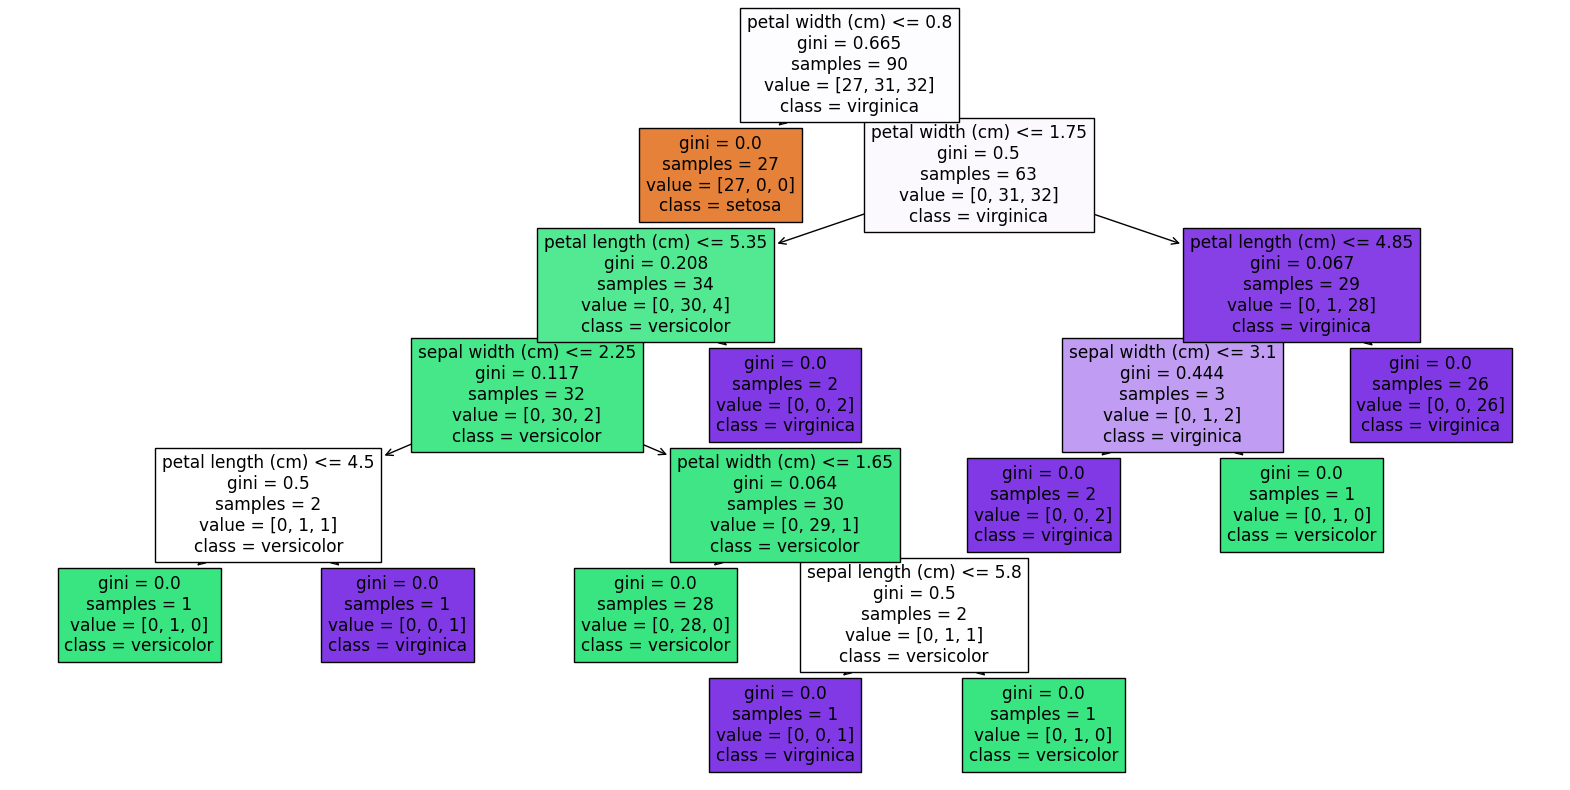

In [102]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=42
)

# Train a decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate the accuracy on the test set as a percentage
accuracy = round(model.score(X_test, y_test) * 100, 2)
print(f"Accuracy on test set: {accuracy}%")

# Visualise the decision tree using Matplotlib  Note - some students reported an error on installing graphviz so using this instead
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

#### Complex trees and overfitting
In the example above note the fact that the depth of the tree has not been limited so it might have overfit on the training data, you can try and address this by limiting the tree depth as shown in the example below - using the parameter max_depth. This can stop the tree from fitting to the noise in the data. 
#### Confusion Matrix
I have also included a confusion matrix in the example below - using the test set. Confusion matrices are useful to identify which classes are misclassified, and as what. How do you think you can use this information?  Note that I also threw in a heat map to better visualise the confusion matrix. 
#### Have you wondered what gini is? 
Gini impurity tells us what the probability of a particular class being wrongly classified is. It is used to determine the optimal split points during the construction of a decision tree.
The Gini impurity for a given node is calculated by subtracting the sum of the squared probabilities of each class in the node from one. 
Lower the Gini index, the better the split. 
A node with a Gini impurity of zero indicates that all the samples in that node belong to the same class, while a node with a Gini impurity of one indicates that the samples are equally distributed among all the classes.
When constructing a decision tree, the algorithm seeks to minimise the Gini impurity of each node by selecting the feature that gives the greatest reduction in impurity when a split is made. So, the decision tree algorithm selects the feature that best separates the classes in the data to maximise the purity of the resulting subsets after the split.

Accuracy on test set: 98.33%


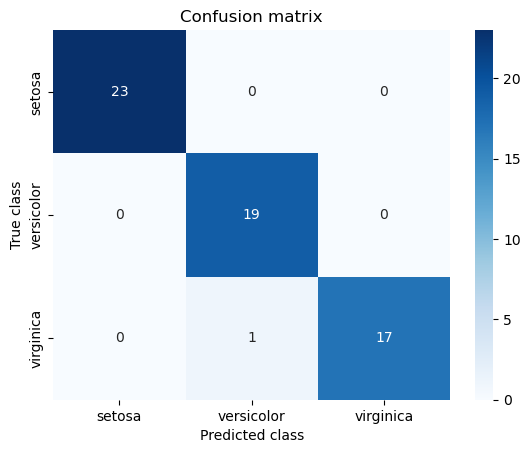

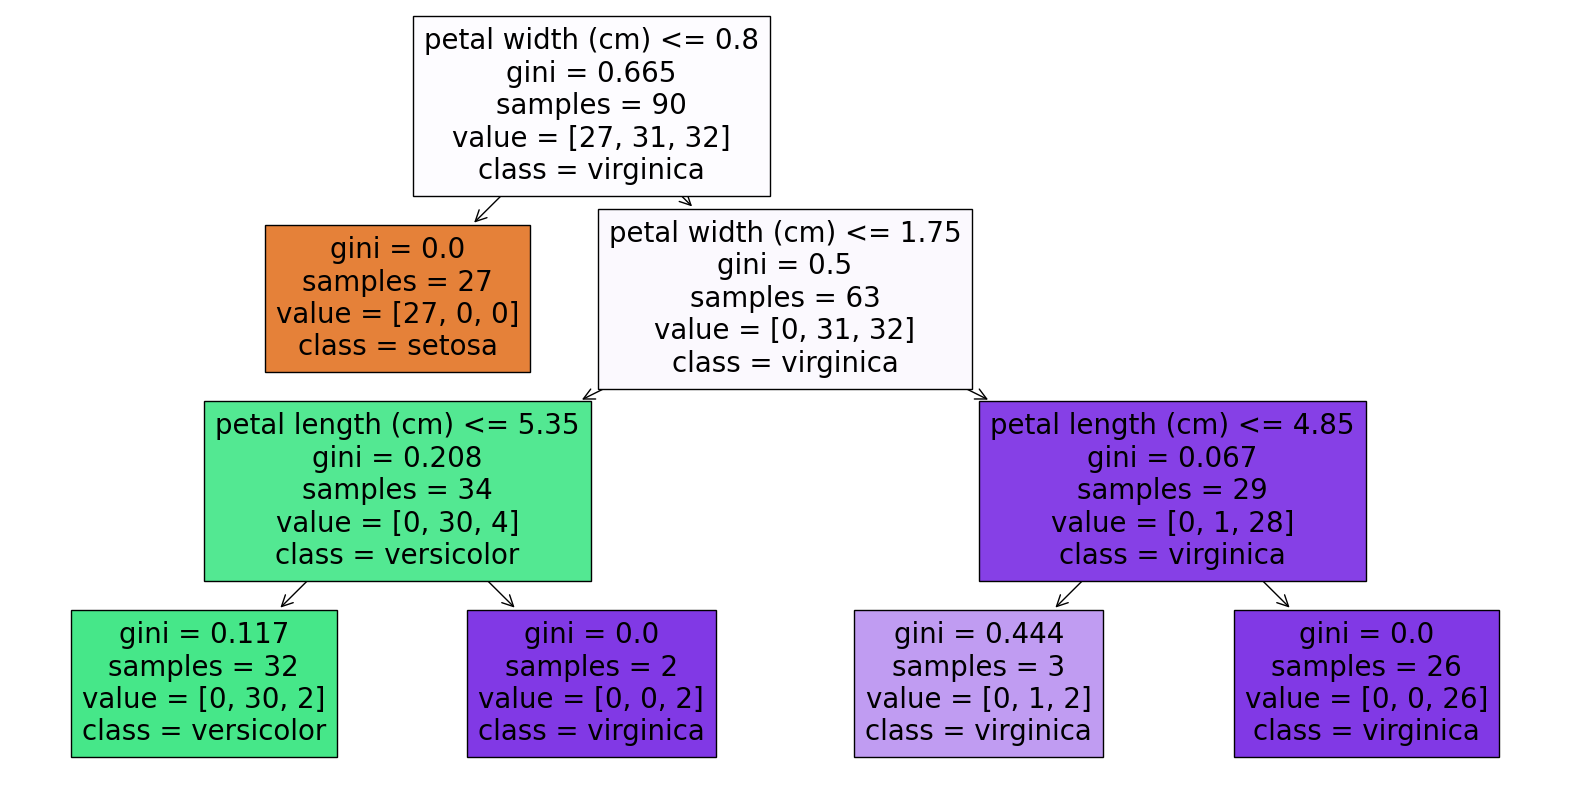

In [103]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.4, random_state=42
)

# Train a regularised decision tree model  - try trees of different depths and see how this affects the results
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Calculate the accuracy on the test set as a percentage
accuracy = round(model.score(X_test, y_test) * 100, 2)
print(f"Accuracy on test set: {accuracy}%")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

# Visualise the decision tree using Matplotlib
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

**Task 7**: 
- Load the cars dataset and split it into training and testing sets. 
- Apply the k-nearest neighbours (KNN) algorithm with different values of k and find the accuracy, precision and recall.
- Use a confusion matrix to compare the performance of the different values of k.

#### More information on Nearest Neighbour Classification https://scikit-learn.org/stable/modules/neighbors.html

#### Remember that the cars dataset used previously needed considerable cleaning
You can look at the lab sessions from the previous weeks
#### You can start by using the rawautodata from previous week or this is a nice dataset to learn with as well https://www.kaggle.com/datasets/uciml/autompg-dataset


In [104]:
import pandas as pd

# Load the dataset
df = pd.read_csv('auto-mpg.csv')

# Check for missing values
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [105]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [106]:
#it looked good but remember how we got caught out last time
df[df['horsepower']=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [107]:
# okay so got to fix this
import numpy as np
df['horsepower'].replace("?",np.nan, inplace=True)

There are 5 unique cylinders in the dataset.


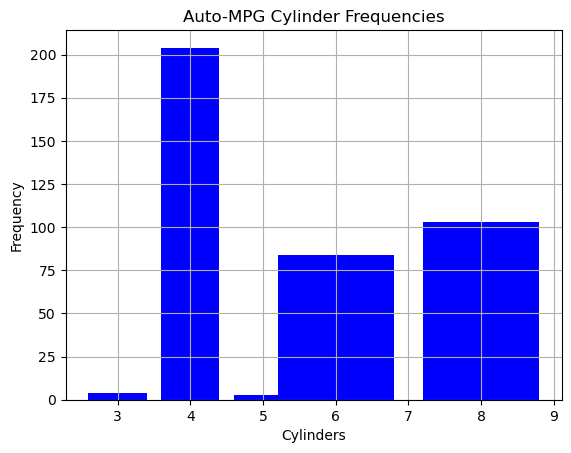

In [128]:
import pandas as pd

# Load the dataset
df = pd.read_csv('auto-mpg.csv')

# Count the number of unique car names
num_unique_cylinders = df['cylinders'].nunique()

print(f"There are {num_unique_cylinders} unique cylinders in the dataset.")

# Create a histogram of cylinder frequencies
df["cylinders"].hist(bins=[3, 4, 5, 6, 8, 10], align="left", rwidth=0.8, color="blue")

# Set the title and axis labels
plt.title("Auto-MPG Cylinder Frequencies")
plt.xlabel("Cylinders")
plt.ylabel("Frequency")

# Display the plot
plt.show()

First of all you have to decide which attribute could be a likely class label - let's go with number of cylinders - although note the distribution is not at all even across all the 5 cylinder numbers. 

Then, as you are doing KNN classification, decide which of the attributes to include. Perhaps you can try PCA as well. 


C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



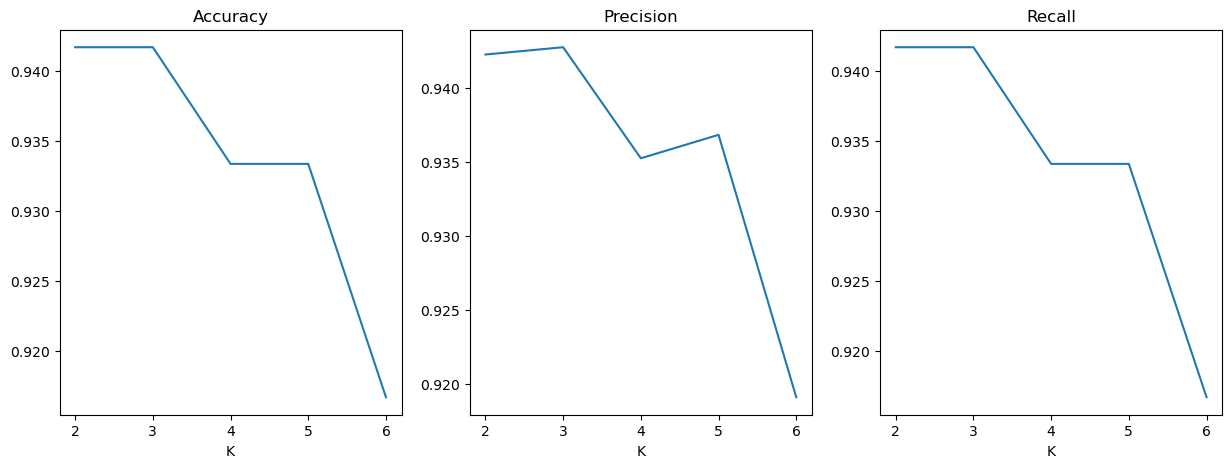

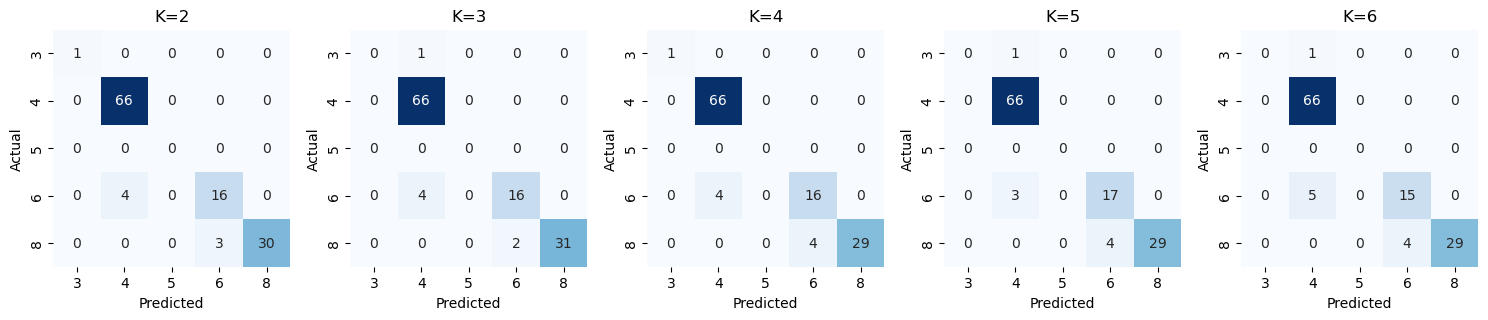

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load auto-mpg dataset
auto = pd.read_csv('auto-mpg.csv', na_values='?')

# Select subset of attributes
attributes = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']
auto = auto[attributes]

# Impute missing values with median
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)

# Split data into features and labels
X = auto.drop('cylinders', axis=1)
y = auto['cylinders']

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define range of K values to try
k_values = range(2, 7)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize arrays to store evaluation metrics
accuracy = np.zeros(len(k_values))
precision = np.zeros(len(k_values))
recall = np.zeros(len(k_values))
conf_matrices = []

# Perform KNN classification for each value of K
for i, k in enumerate(k_values):
    # Fit KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = knn.predict(X_test)
    
    # Compute evaluation metrics
    accuracy[i] = accuracy_score(y_test, y_pred)
    precision[i] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall[i] = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 8]))
    
# Plot evaluation metrics as a function of K
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(k_values, accuracy)
axs[0].set_title('Accuracy')

axs[1].plot(k_values, precision)
axs[1].set_title('Precision')

axs[2].plot(k_values, recall)
axs[2].set_title('Recall')

for ax in axs:
    ax.set_xlabel('K')
    ax.set_xticks(k_values)

# Plot confusion matrices
fig, axs = plt.subplots(1, len(k_values), figsize=(15, 3))
axis_labels = [3, 4, 5, 6, 8] # labels for axis
for i, conf_matrix in enumerate(conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axs[i], cbar=False, square=True, xticklabels=axis_labels, yticklabels=axis_labels)
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')
    axs[i].set_title(f'K={k_values[i]}')

plt.tight_layout()
plt.show()



**Task 8**: 
- Load the Wisconsin breast cancer dataset from scikit-learn and split it into training and testing sets. 
- Train a support vector machine (SVM) model to classify the tumors as malignant or benign based on their features. 
- Evaluate the precision, recall of the model on the testing set
- Experiment with different kernel functions and report the accuracy, precision and recall.
- Use a confusion matrix and ROC curve to compare the performance of the different kernels.

#### More information on Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html#

In [110]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


In [111]:
# Train a SVM model with default kernel
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Calculate the precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.922077922077922
Recall: 1.0


In [87]:
# Train SVM models with different kernels
kernels = ['linear', 'poly', 'sigmoid', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)

    # Predict the labels for the testing set
    y_pred = clf.predict(X_test)

    # Calculate the precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = clf.score(X_test, y_test)

    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}\n")


Kernel: linear
Accuracy: 0.956
Precision: 0.946
Recall: 0.986

Kernel: poly
Accuracy: 0.947
Precision: 0.922
Recall: 1.000

Kernel: sigmoid
Accuracy: 0.465
Precision: 0.560
Recall: 0.662

Kernel: rbf
Accuracy: 0.947
Precision: 0.922
Recall: 1.000



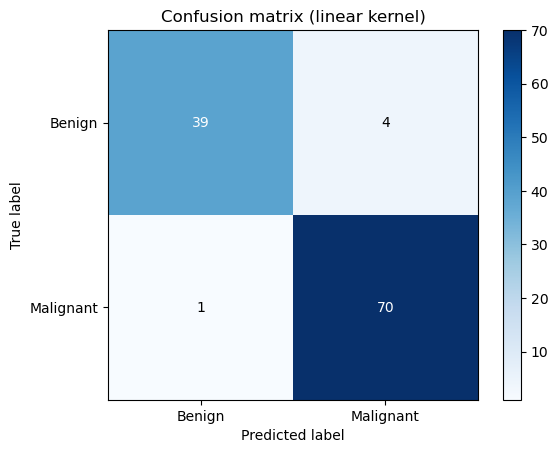

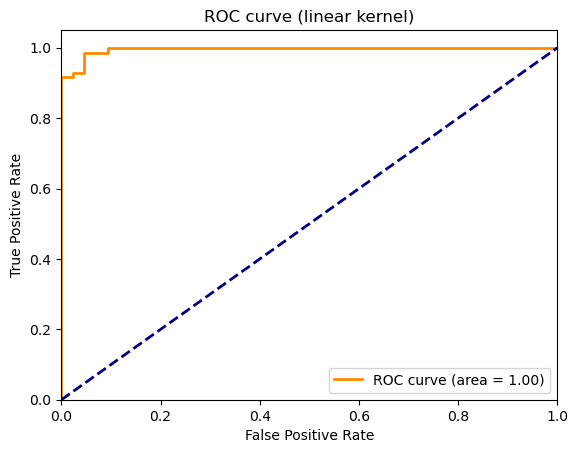

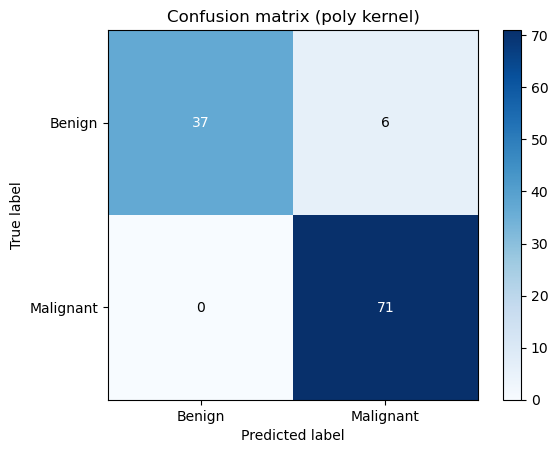

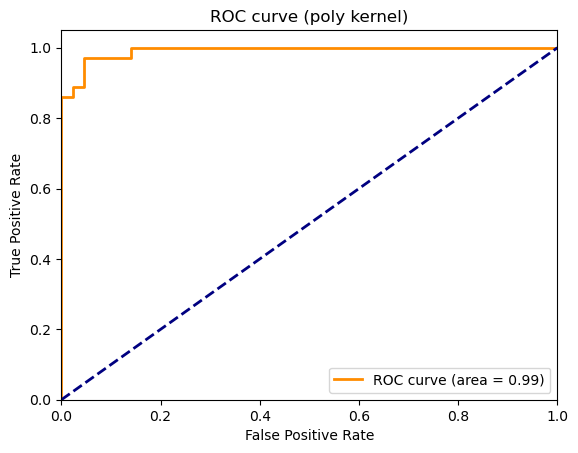

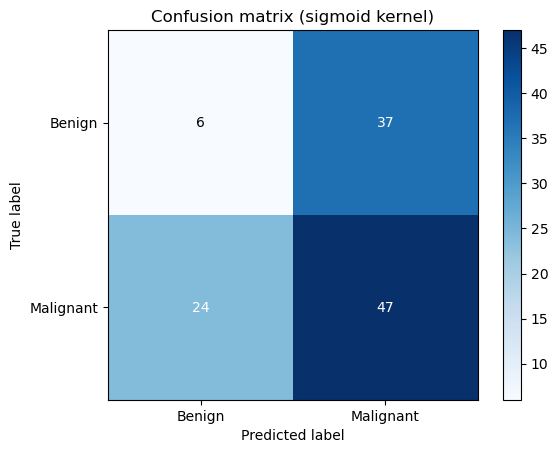

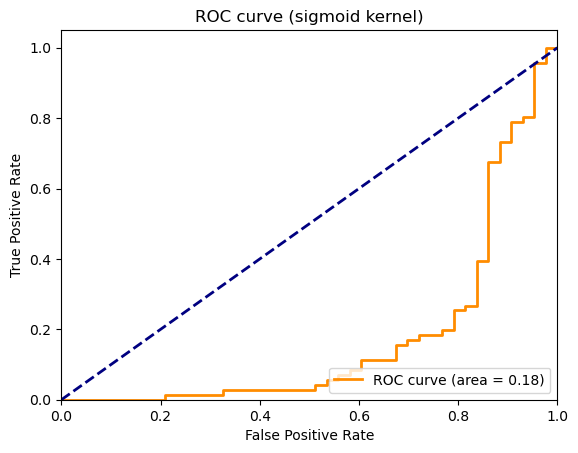

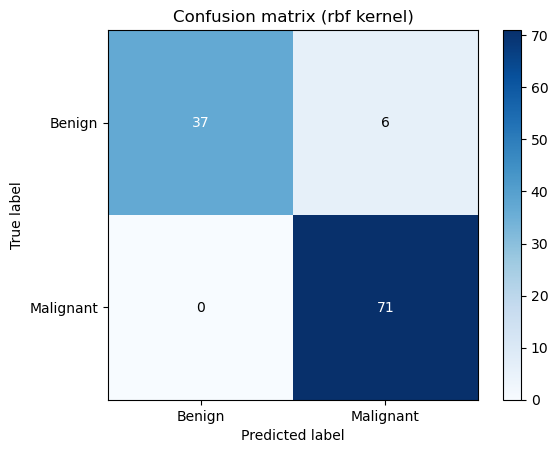

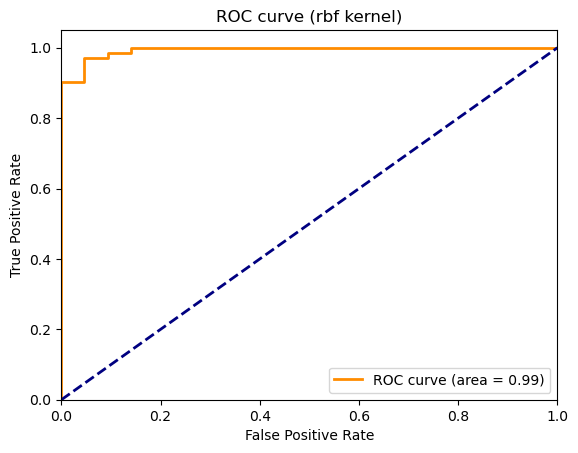

**Task 9**: 
- Load the digits dataset from scikit-learn and split it into training and testing sets. 
- Train a Random Forest model to classify the handwritten digits based on their pixel values. 
- Evaluate the accuracy of the model on the testing set.

#### More information on Random Forest Classifiers https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier 

#### Digits Dataset https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [113]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.976


So, we did this with just one split of training and test set - that is not really a good way to test a model -should use an n-fold validation - as below, and find the mean accuracy. 

In [114]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load the digits dataset
digits = load_digits()

# Create a Random Forest model with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
scores = cross_val_score(clf, digits.data, digits.target, cv=5)

# Print the accuracy scores for each fold and the mean accuracy score
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.3f}")
print(f"Mean accuracy: {scores.mean():.3f}")


Fold 1: 0.931
Fold 2: 0.911
Fold 3: 0.958
Fold 4: 0.969
Fold 5: 0.928
Mean accuracy: 0.939


Accuracy scores: [0.98333333 0.98055556 0.96657382 0.98328691 0.97771588]
Mean accuracy: 0.978


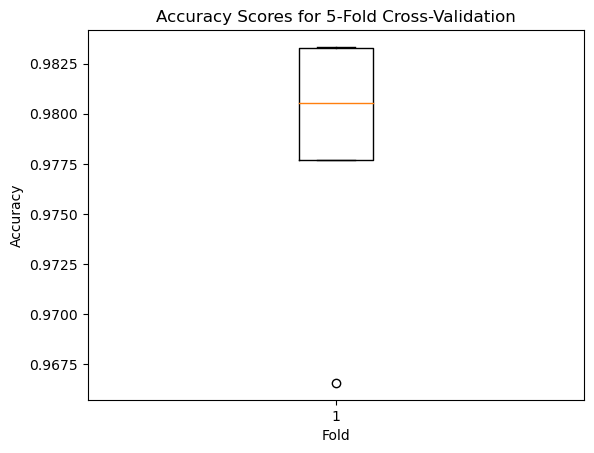

Confusion matrix for fold 1:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  0  1  0]
 [ 0  0  0  0 36  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  1  0 35]]
Confusion matrix for fold 2:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  0  0]
 [ 0  0  0  0 34  0  0  2  0  0]
 [ 0  0  0  0  0 36  1  0  0  0]
 [ 1  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  1 35]]
Confusion matrix for fold 3:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 1  0 33  0  0  0  0  0  0  1]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 1  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0 

In [95]:
from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the digits dataset
digits = load_digits()

# Create a Random Forest model with 100 trees
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, digits.data, digits.target, cv=skf)
print(f"Accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

# Plot the accuracy scores for each fold
fig, ax = plt.subplots()
ax.boxplot(scores)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for 5-Fold Cross-Validation')
plt.show()

# Create confusion matrices for each fold
for i, (train_index, test_index) in enumerate(skf.split(digits.data, digits.target)):
    # Get the training and testing data for this fold
    X_train, X_test = digits.data[train_index], digits.data[test_index]
    y_train, y_test = digits.target[train_index], digits.target[test_index]
    
    # Fit the model on the training data and make predictions on the testing data
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Create the confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion matrix for fold {i+1}:")
    print(cm)


**Task 10**: 
- Load the wine dataset and use an artificial neural network (multi-layer perceptron - MLP) for classification, splitting the data into a training and test set.
- Experiment with different number of neurons in a single hidden layer using sigmoid activation functions and report the accuracy, precision and recall for different number of neurons on the training set. 
- Use a confusion matrix to compare the performance of the MLP with the optimal number of neurons for different number of iterations.

#### More information on MLPs https://scikit-learn.org/stable/modules/neural_networks_supervised.html

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Number of neurons	Accuracy	Precision	Recall
3			0.43		0.27		0.43
4			0.39		0.15		0.39
5			0.98		0.98		0.98
6			0.39		0.15		0.39
7			0.98		0.98		0.98

Optimal number of neurons: 5



C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.



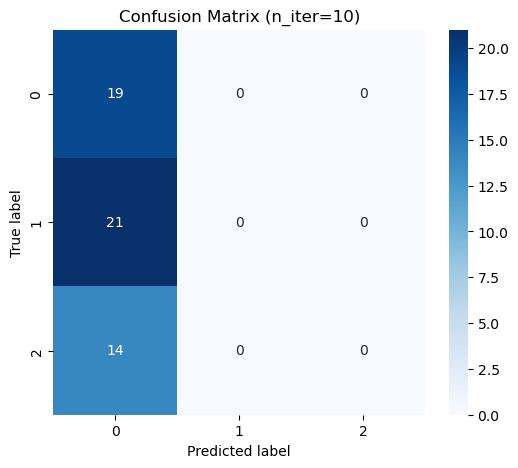

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.



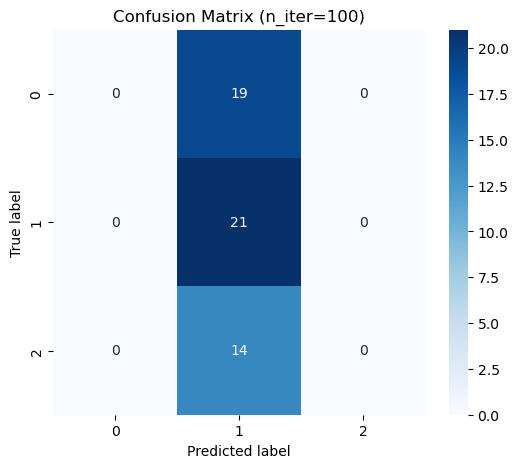

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



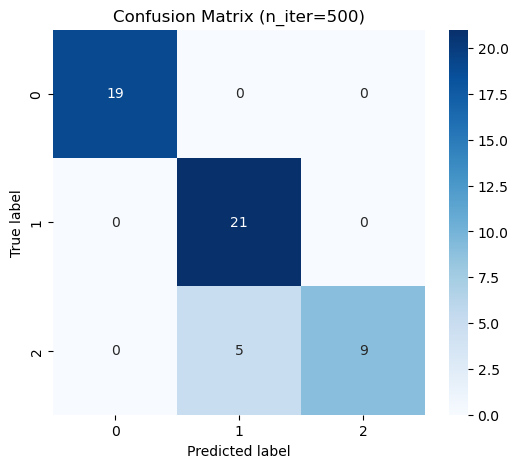

C:\Users\PSZPC1\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



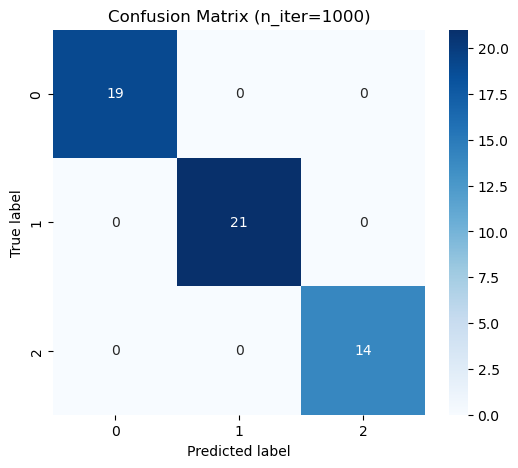

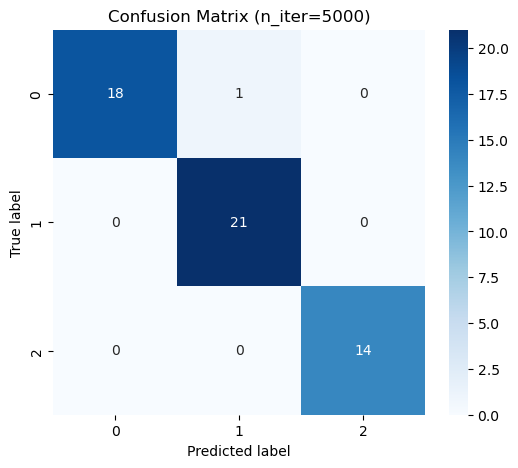

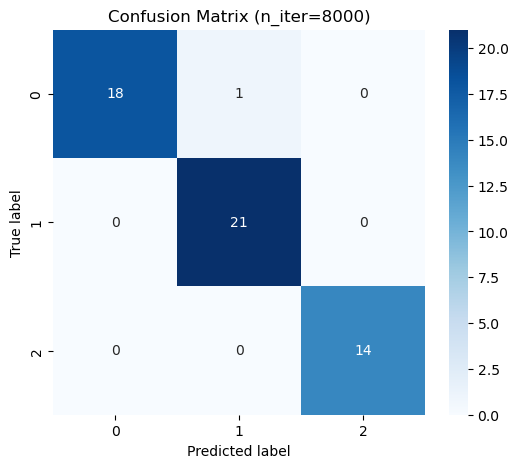

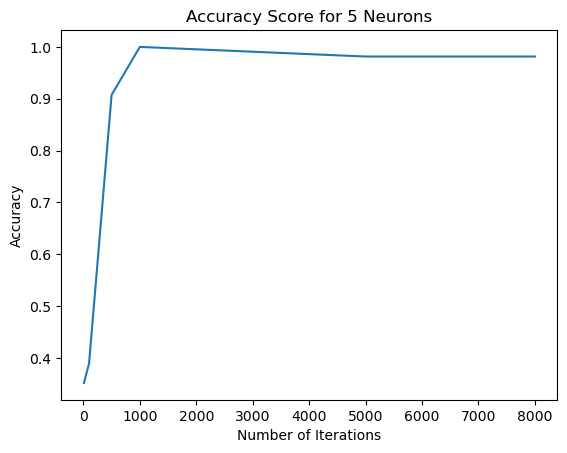

In [115]:
from sklearn.datasets import load_wine
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experiment with different number of neurons from 1 to 5 in a single hidden layer using sigmoid activation functions
neurons = [3, 4, 5, 6, 7]
train_scores_acc = []
train_scores_prec = []
train_scores_rec = []
optimal_neurons = None
optimal_score = 0

for n in neurons:
    # Train an MLP with n neurons in a single hidden layer using sigmoid activation function on the training set
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic', max_iter=2000, random_state=42)
    mlp.fit(X_train, y_train)

    # Evaluate the MLP on the training set
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_scores_acc.append(accuracy_score(y_test, y_pred_test))
    train_scores_prec.append(precision_score(y_test, y_pred_test, average='weighted'))
    train_scores_rec.append(recall_score(y_test, y_pred_test, average='weighted'))

    # Update optimal number of neurons if score is better
    score = accuracy_score(y_test, y_pred_test)
    if score > optimal_score:
        optimal_score = score
        optimal_neurons = n

# Report the accuracy, precision, and recall scores for each number of neurons
print("Number of neurons\tAccuracy\tPrecision\tRecall")
for i in range(len(neurons)):
    print(f"{neurons[i]}\t\t\t{train_scores_acc[i]:.2f}\t\t{train_scores_prec[i]:.2f}\t\t{train_scores_rec[i]:.2f}")

print(f"\nOptimal number of neurons: {optimal_neurons}\n")

# Train an MLP with the optimal number of neurons on the training set with different number of iterations
iters = [10, 100, 500, 1000, 5000, 8000]
test_scores = []
for i in range(len(iters)):
    mlp = MLPClassifier(hidden_layer_sizes=(optimal_neurons,), activation='logistic', max_iter=iters[i], random_state=42)
    mlp.fit(X_train, y_train)

    # Evaluate the MLP on the test set
    y_pred_test = mlp.predict(X_test)
    test_scores.append(accuracy_score(y_test, y_pred_test))

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title(f"Confusion Matrix (n_iter={iters[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

# Plot the accuracy scores against the number of iterations
plt.plot(iters, test_scores)
plt.title(f"Accuracy Score for {optimal_neurons} Neurons")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.show()


# Refine your models and analysis


**Task 11**: 
- Experiment with other different hyperparameters of each algorithm such as:
    - learning rate
    - number of neighbours
    - maximum depth of the tree
    - kernel functions, etc.

#### HINT
You will need to review the parameters for each different type of algorithm and consider which is relevant for which. 

**Task 12**: 
- Use cross-validation to validate the performance of each algorithm and select the best hyperparameters.

#### HINT
What do you note about the results across the different partitions? Think about looping through the different parameters to find the optimal set.

**Task 13**: 
- Use feature selection techniques such as PCA and correlation analysis to select the most relevant features for each dataset.
- repeat the clustering and classification tasks, comparing the performance of different algorithms using different evaluation metrics such as appropriate:
    - accuracy
    - precision
    - recall
    - ROC curve
    - silhouette score

#### HINT
The only way to learn this subject is through multiple experiments and playing around with the different parameters and metrics to understand their value.
So Data science is very much about understanding the application domain to help inform your assessment make sense or are acceptable for the given problem - so for a ML system that is a decision support system for cancer diagnosis for example - you would like to err on the side of caution - have a few false positives and avoid any false negatives. However, how to get the balance right? one way to consider this is to think about the impact of the errors in your system. 

**Task 14**: 
- Visualise the clustering results using scatter plots, dendrograms, or other visualisation techniques to gain insights into the structure of the data.

#### HINT
Compare and contrast the different visualision approaches for the level of information they provide you to determine the next steps in the ML pipeline. 